In [1]:
import logging
from pathlib import Path

from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from matplotlib import pyplot as plt
from statix.exposure import Exposure
from statix.plotting import plot_image

plt.style.use("Solarize_Light2")

logging.basicConfig(level=logging.INFO)
data_path = Path(".", "data")


def source_marker(ax, coords):
    ax.scatter(*coords, marker="o", edgecolor="w", s=100, c="none", linewidths=2)

SAS has not been initialized in your system!
SAS-related functions not available!!!
SAS has not been initialized in your system!
SAS-related functions not available!!!


In [2]:
event_list_path = data_path / "pnevt.fits"
attitude_path = data_path / "att.fits"
xmmexp = Exposure(event_list_path, attitude_path)

# Transient source used as input for the simulation
ssc = SkyCoord(0, 0, unit="deg")
spc = ssc.to_pixel(xmmexp.image.wcs)

xmmexp

Exp.ID: S003 [EPN camera], Obs.ID: 0000000000
Energy band for products: SOFT (0.5-2.0 keV)
Nominal pointing: 00h00m00s +00d00m00s
PA: 90.0 deg

In [3]:
srclist_emldet = xmmexp.detect_sources(method="emldetect", likemin=6)

INFO:statix.exposure:Detecting sources using emldetect algorithm...


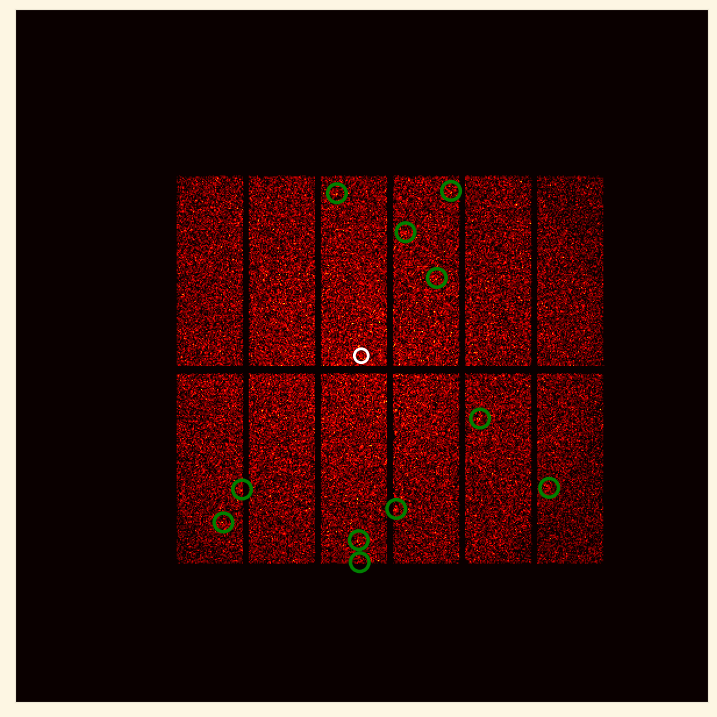

In [4]:
fig = plt.figure(figsize=(9, 9))
ax = plt.subplot(111)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=srclist_emldet)
source_marker(ax, spc)
plt.show()

In [5]:
srclist_msvst2d, image_msvst = xmmexp.detect_sources(method="msvst2d", sigma_level=3)

INFO:statix.exposure:Detecting sources using msvst2d algorithm...
INFO:statix.source_detection:Filling image gaps...
INFO:statix.source_detection:Denoising image using 2D MSVST...
INFO:statix.source_detection:Finding peaks in denoised image...
INFO:statix.source_detection:Extracting counts for 163 sources...
INFO:statix.exposure:Calculating background image
INFO:statix.counts:Extracting light-curves...
INFO:statix.source_detection:Calculating fluxes...


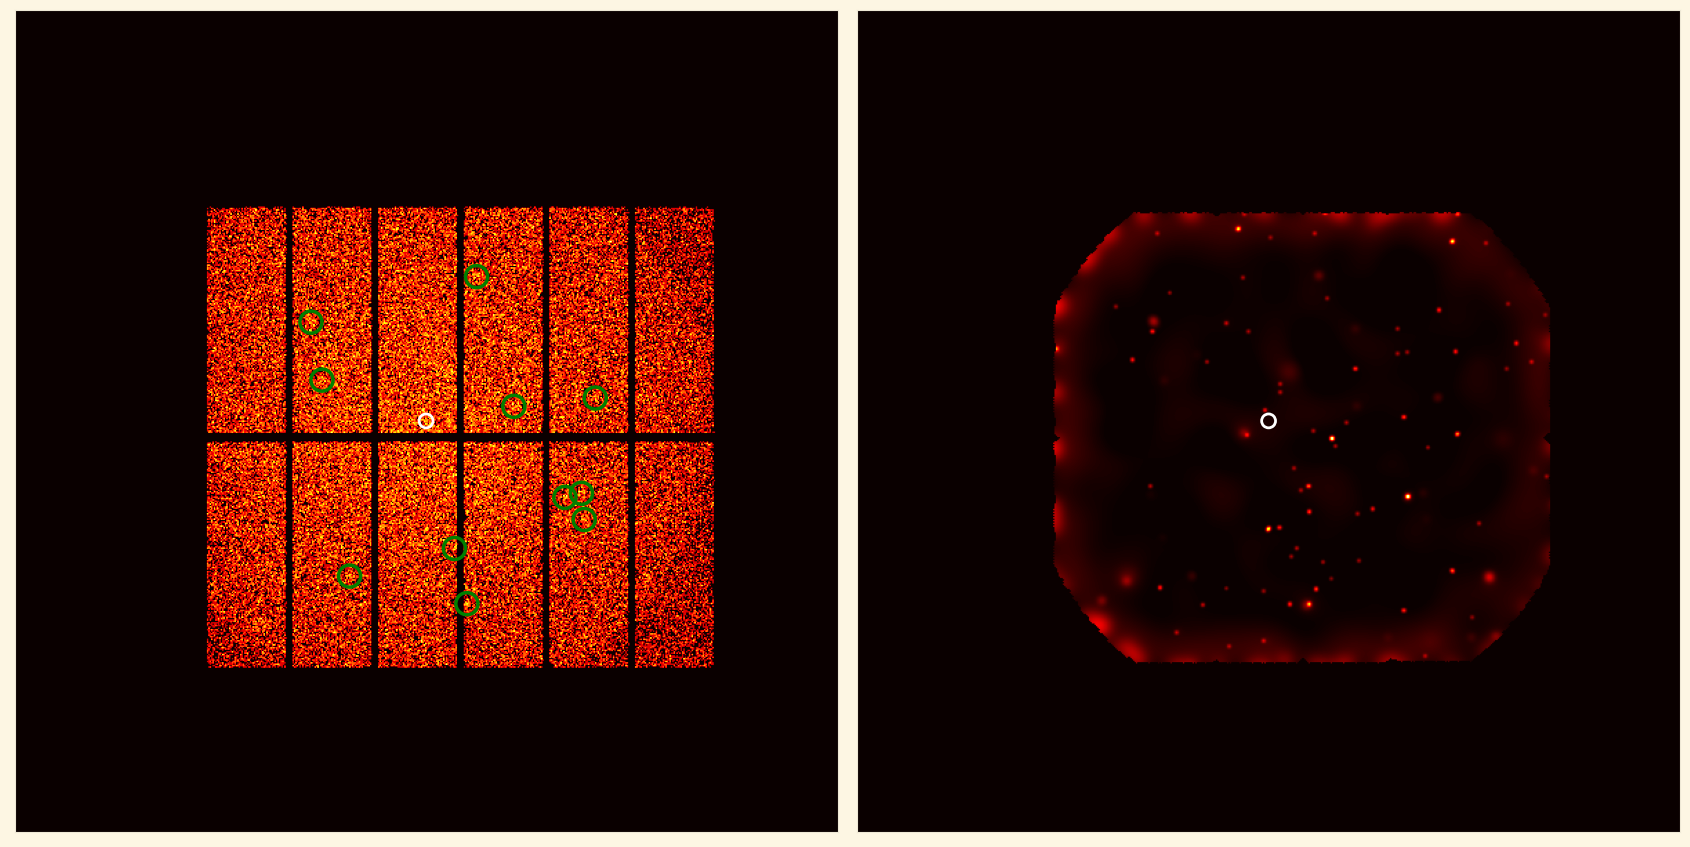

In [6]:
mask_detections = srclist_msvst2d["DET_ML"] > 6
detections = srclist_msvst2d[mask_detections]

norm = simple_norm(xmmexp.image.data, "asinh")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.image.data, norm=norm, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, image_msvst.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [ ]:
srclist_msvst, cube_msvst = xmmexp.detect_sources(method="msvst2d1d")

INFO:statix.exposure:Detecting sources using msvst2d1d algorithm...
INFO:statix.exposure:Filling cube gaps (mca)...


In [ ]:
mask_detections = srclist_msvst["DET_ML"] > 6
detections = srclist_msvst[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "linear")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, norm=norm, cmap="hot", srclist=detections)

ax = plt.subplot(122)
plot_image(ax, cube_msvst.time_integrated.data, use_norm=False, cmap="hot")

plt.tight_layout()
plt.show()

In [ ]:
srclist_msvst2, cube_msvst = xmmexp.detect_sources(method="msvst2d1d", time_sigma_level=4, sigma_level=4)

In [ ]:
mask_detections = srclist_msvst2["DET_ML"] >= 0
detections = srclist_msvst2[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "linear")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, norm=norm, cmap="hot", srclist=detections)

ax = plt.subplot(122)
plot_image(ax, cube_msvst.time_integrated.data, use_norm=False, cmap="hot")

plt.tight_layout()
plt.show()

In [ ]:
plt.plot(srclist_msvst["LC"][2][:, 0])
plt.plot(srclist_msvst["LC"][2][:, 1])